Zach Hill

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from yellowbrick.features import Rank2D
from yellowbrick.features import Rank2D
from yellowbrick.style import set_palette
from yellowbrick.features import ParallelCoordinates
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

In [4]:
# Import data
red = pd.read_csv('./winequality-red.csv')
white = pd.read_csv('./winequality-white.csv')

In [5]:
# Verify reds table imported correctly
print('Dimensions of red:', red.shape), red.head()

Dimensions of red: (1599, 12)


(None,
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 0            7.4              0.70         0.00             1.9      0.076   
 1            7.8              0.88         0.00             2.6      0.098   
 2            7.8              0.76         0.04             2.3      0.092   
 3           11.2              0.28         0.56             1.9      0.075   
 4            7.4              0.70         0.00             1.9      0.076   
 
    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
 0                 11.0                  34.0   0.9978  3.51       0.56   
 1                 25.0                  67.0   0.9968  3.20       0.68   
 2                 15.0                  54.0   0.9970  3.26       0.65   
 3                 17.0                  60.0   0.9980  3.16       0.58   
 4                 11.0                  34.0   0.9978  3.51       0.56   
 
    alcohol  quality  
 0      9.4        5  
 1      9.8        

In [6]:
# Verify whites table imported correctly
print('Dimensions of white:', white.shape), white.head()

Dimensions of white: (4898, 12)


(None,
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 0            7.0              0.27         0.36            20.7      0.045   
 1            6.3              0.30         0.34             1.6      0.049   
 2            8.1              0.28         0.40             6.9      0.050   
 3            7.2              0.23         0.32             8.5      0.058   
 4            7.2              0.23         0.32             8.5      0.058   
 
    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
 0                 45.0                 170.0   1.0010  3.00       0.45   
 1                 14.0                 132.0   0.9940  3.30       0.49   
 2                 30.0                  97.0   0.9951  3.26       0.44   
 3                 47.0                 186.0   0.9956  3.19       0.40   
 4                 47.0                 186.0   0.9956  3.19       0.40   
 
    alcohol  quality  
 0      8.8        6  
 1      9.5        

In [7]:
# Verify dataframes unioned correctly
wine = pd.concat([red, white], ignore_index = True)

wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


Pearson Rankings Heatmap:


array([[ 7.4 ,  0.7 ,  0.  , ...,  0.56,  9.4 ,  5.  ],
       [ 7.8 ,  0.88,  0.  , ...,  0.68,  9.8 ,  5.  ],
       [ 7.8 ,  0.76,  0.04, ...,  0.65,  9.8 ,  5.  ],
       ...,
       [ 6.5 ,  0.24,  0.19, ...,  0.46,  9.4 ,  6.  ],
       [ 5.5 ,  0.29,  0.3 , ...,  0.38, 12.8 ,  7.  ],
       [ 6.  ,  0.21,  0.38, ...,  0.32, 11.8 ,  6.  ]])

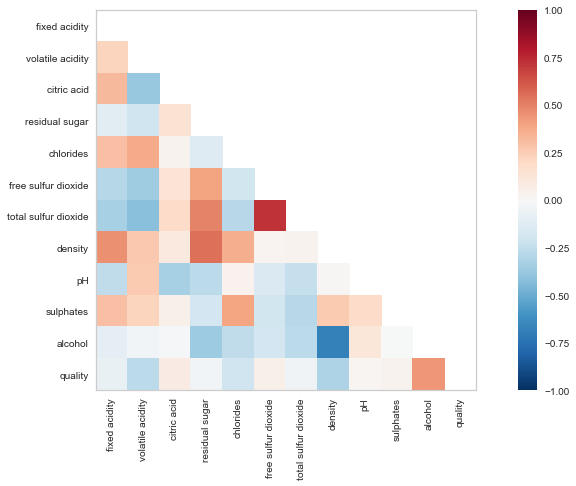

In [6]:
# Pearson Correlation rankings of features
print('Pearson Rankings Heatmap:')
plt.rcParams['figure.figsize'] = (15, 7)

X = wine[wine.columns].values

visualizer = Rank2D(features=wine.columns, algorithm='pearson')
visualizer.fit(X)
visualizer.transform(X)

In [7]:
# Univariate feature selection using quality as the output variable
X = wine.iloc[:,0:11]
y = wine.iloc[:,-1]

# Apply SelectKBest to find best features
best = SelectKBest(score_func = chi2, k = 10)
fit = best.fit(X,y)

scores = pd.DataFrame(fit.scores_)
columns = pd.DataFrame(X.columns)

featureScores = pd.concat([columns, scores], axis = 1)
featureScores.columns = ['Measure','Score']

print(featureScores.nlargest(11,'Score'))

                 Measure        Score
6   total sulfur dioxide  1269.974108
5    free sulfur dioxide   913.332832
3         residual sugar   225.657151
10               alcohol   201.369195
1       volatile acidity    42.528980
0          fixed acidity    11.115118
4              chlorides     6.388650
2            citric acid     3.673977
9              sulphates     1.078473
8                     pH     0.097332
7                density     0.006600


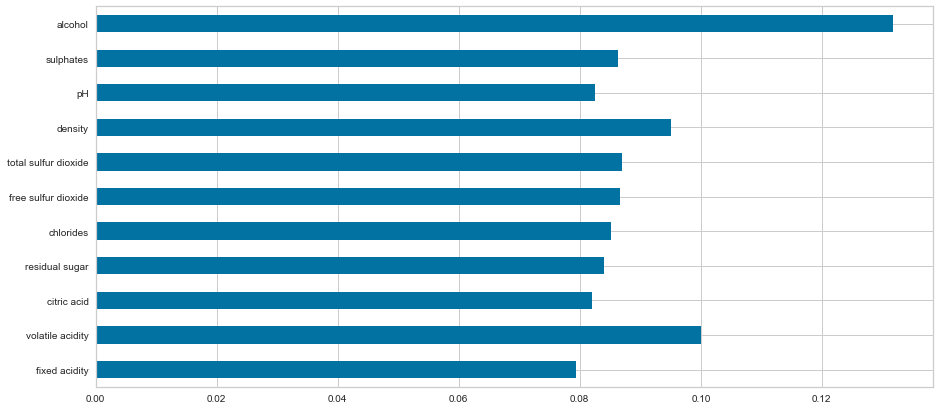

In [8]:
# Plot the features by importance
model = ExtraTreesClassifier(n_estimators = 100)
model.fit(X,y)

feat_importances = pd.Series(model.feature_importances_, index = X.columns)
feat_importances.plot(kind='barh')
plt.show()

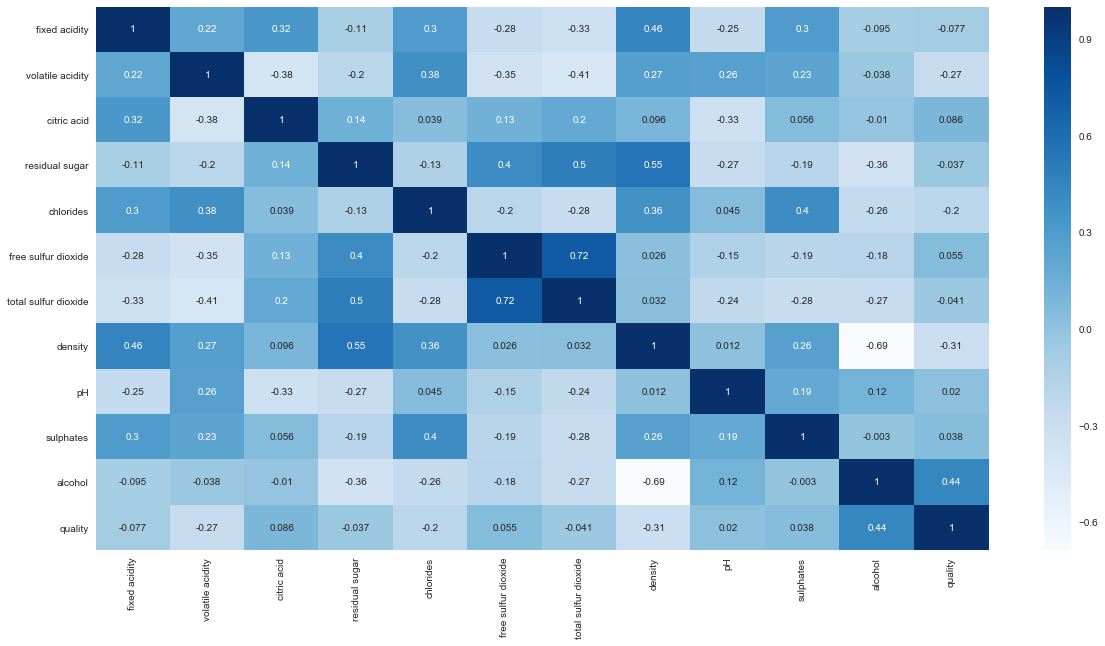

In [9]:
# Heatmap to visualize correlations between variables
corr_matrix = wine.corr()
best_features = corr_matrix.index
plt.figure(figsize=(20,10))

g = sns.heatmap(wine[best_features].corr(), annot = True, cmap = "Blues")

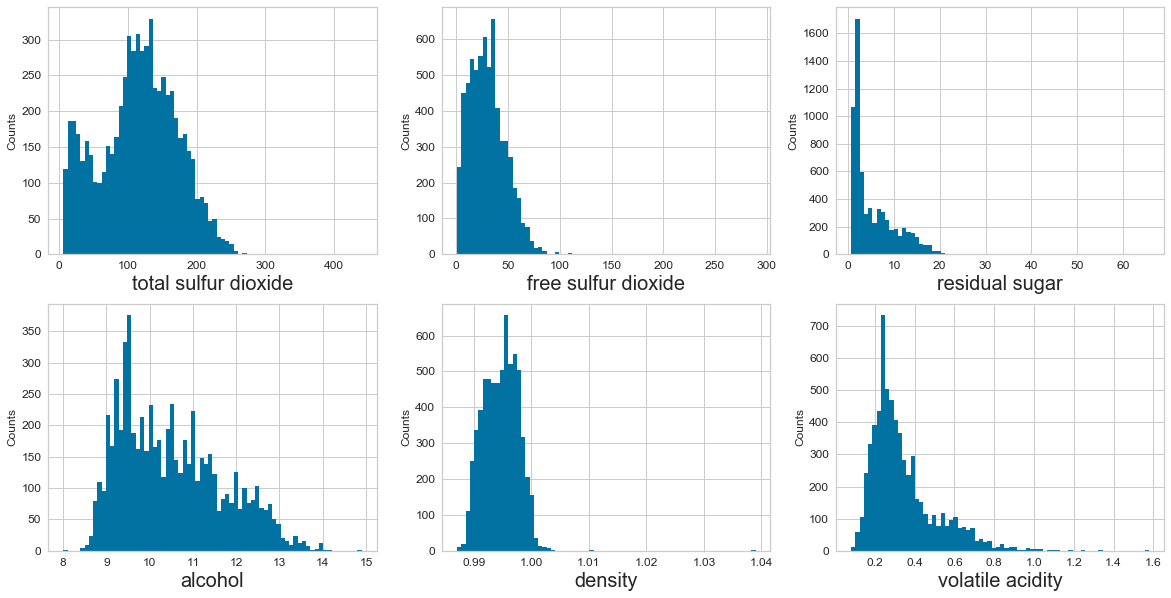

In [10]:
# Histograms to check distribution of features among set
plt.rcParams['figure.figsize'] = (20, 10)
fig, axes = plt.subplots(nrows = 2, ncols = 3)

xlabs = ['total sulfur dioxide', 'free sulfur dioxide', 'residual sugar', 'alcohol', 'density', 'volatile acidity']

axes = axes.ravel()

for x, ax in enumerate(axes):
    ax.hist(wine[xlabs[x]].dropna(), bins=70)
    ax.set_xlabel(xlabs[x], fontsize=20)
    ax.set_ylabel('Counts', fontsize=12)
    ax.tick_params(axis='both', labelsize=12)

In [11]:
# We see a few heavily skewed charts here, especially residual sugar. Applying Log1 to RS might be beneficial
def log_transformation(df):
    return df.apply(np.log1p)

wine['RS_log'] = log_transformation(wine['residual sugar'])

print(wine.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000         

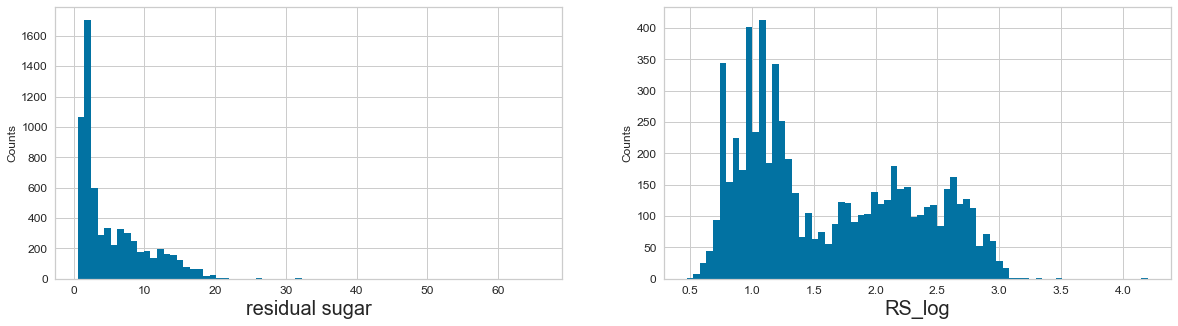

In [12]:
# Histograms to check distribution of features among set
plt.rcParams['figure.figsize'] = (20, 5)
fig, axes = plt.subplots(nrows = 1, ncols = 2)

xlabs = ['residual sugar', 'RS_log']

axes = axes.ravel()

for x, ax in enumerate(axes):
    ax.hist(wine[xlabs[x]].dropna(), bins=70)
    ax.set_xlabel(xlabs[x], fontsize=20)
    ax.set_ylabel('Counts', fontsize=12)
    ax.tick_params(axis='both', labelsize=12)

In [15]:
cat_features = ['quality']
wine_cat = wine[cat_features]

wine_cat_dummies = pd.get_dummies(wine_cat)

print(wine_cat_dummies.head(5))

   quality
0        5
1        5
2        5
3        6
4        5


In [32]:
features_model = ['total sulfur dioxide', 'free sulfur dioxide', 'RS_log', 'alcohol', 'density', 'volatile acidity']

data_model_X = pd.concat([wine[features_model], wine_cat_dummies], axis=1)
data_model_y = wine.replace({'quality': {3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9'}})['quality']

In [40]:
X_train, X_val, y_train, y_val = train_test_split(data_model_X, data_model_y, test_size =0.50, random_state=11)

# number of samples in each set
print("No. of samples in training set: ", X_train.shape[0])
print("No. of samples in validation set:", X_val.shape[0])

# Survived and not-survived
print('\n')
print('Distribution of Wine Quality in the training set:')
print(y_train.value_counts())

print('\n')
print('Distribution of Wine Quality in the validation set:')
print(y_val.value_counts())

No. of samples in training set:  3248
No. of samples in validation set: 3249


Distribution of Wine Quality in the training set:
6    1413
5    1063
7     532
4     118
8     101
3      18
9       3
Name: quality, dtype: int64


Distribution of Wine Quality in the validation set:
6    1423
5    1075
7     547
4      98
8      92
3      12
9       2
Name: quality, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


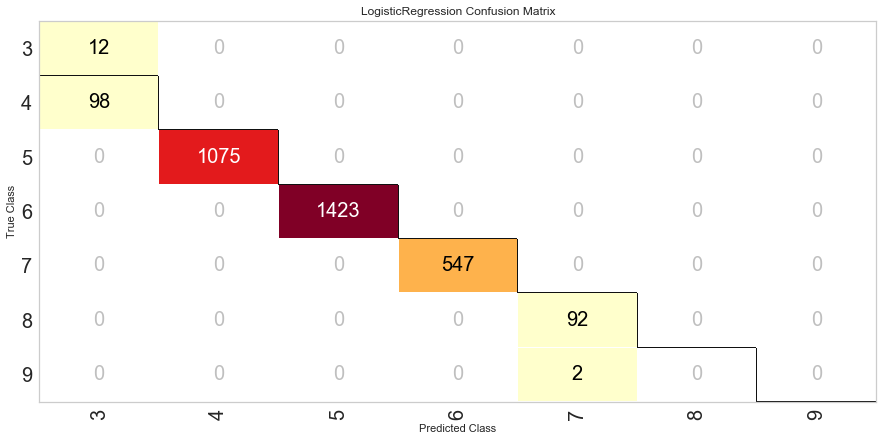

In [44]:
model = LogisticRegression(solver = 'lbfgs', max_iter = 100000, multi_class = 'auto')

classes = ['3', '4', '5', '6', '7', '8', '9']

cm = ConfusionMatrix(model, classes = classes, percent=False)

cm.fit(X_train, y_train)

cm.score(X_val, y_val)

for label in cm.ax.texts:
    label.set_size(20)
    
cm.poof()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


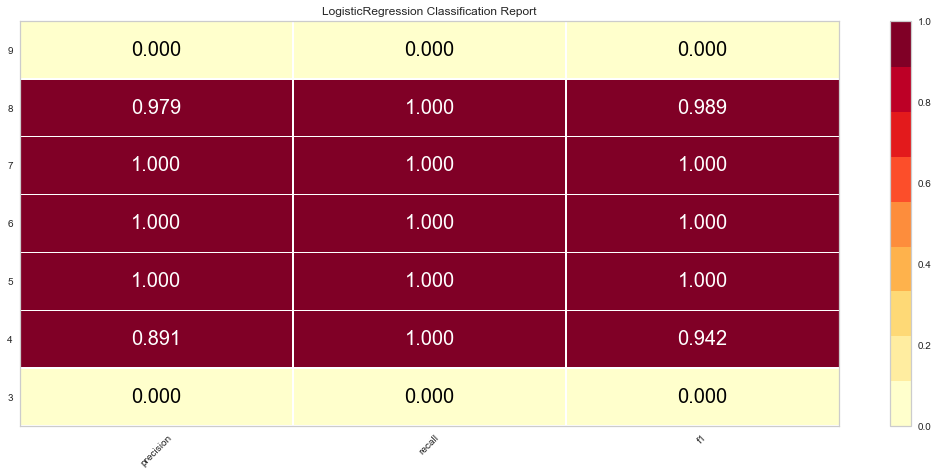

In [45]:
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

visualizer = ClassificationReport(model, classes = classes)

visualizer.fit(X_train, y_train)
visualizer.score(X_val, y_val)
g = visualizer.poof()

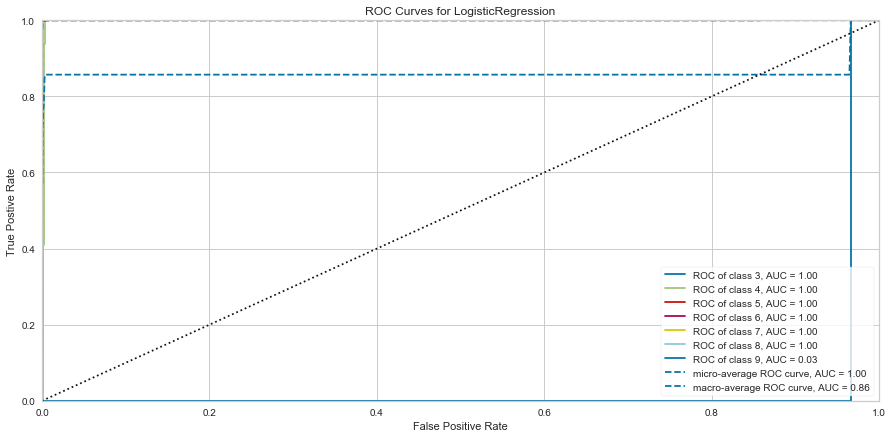

In [46]:
visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train)
visualizer.score(X_val, y_val)
g = visualizer.poof()